In [232]:
import pandas as pd
import numpy as np
import csv,os,sys,time
import matplotlib.pyplot as plt
import datetime,utm
###测试

import matplotlib.cm as cm
import operator as o
import matplotlib

## 前期库函数准备 之后不再放置
import csv,os,numpy
import numpy as np
import matplotlib.mlab as ml
from matplotlib.tri import Triangulation, UniformTriRefiner
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.patches import Polygon
import gdal
import matplotlib.cm as cm
import math
import scipy
from matplotlib.collections import PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PatchCollection
### 插值问题
from scipy import interpolate
%matplotlib inline
## Add Colorbar
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
### 均一化
from sklearn.preprocessing import normalize

### shapely
import fiona
from shapely.geometry import shape
from shapely.geometry import Polygon, Point

f1 = pd.read_csv("../../../../../conc/doc/true/2014真值整合表_1月.csv") 
f2 = pd.read_csv("../../../../../conc/doc/true/2014真值整合表_4月.csv") 
f3 = pd.read_csv("../../../../../conc/doc/true/2014真值整合表_7月.csv") 
f4 = pd.read_csv("../../../../../conc/doc/true/2014真值整合表_10月.csv")
s1 = pd.read_csv("../../../../../conc/doc/correlation/1226版本/1月浓度7站点.csv")
s2 = pd.read_csv("../../../../../conc/doc/correlation/1226版本/4月浓度7站点.csv")
s3 = pd.read_csv("../../../../../conc/doc/correlation/1226版本/7月浓度7站点.csv")
s4 = pd.read_csv("../../../../../conc/doc/correlation/1226版本/10月浓度7站点.csv")
xc1,xc2,yc1,yc2 = 113.49805889531724,115.5030664238035,37.39995194888143,38.789235929357105

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False

## 1. 模拟数据质量评估

### 1.1 各季节特征月份 $SO_2$ 以及 $NO_2$ 浓度日均浓度值模拟 v.s 实际

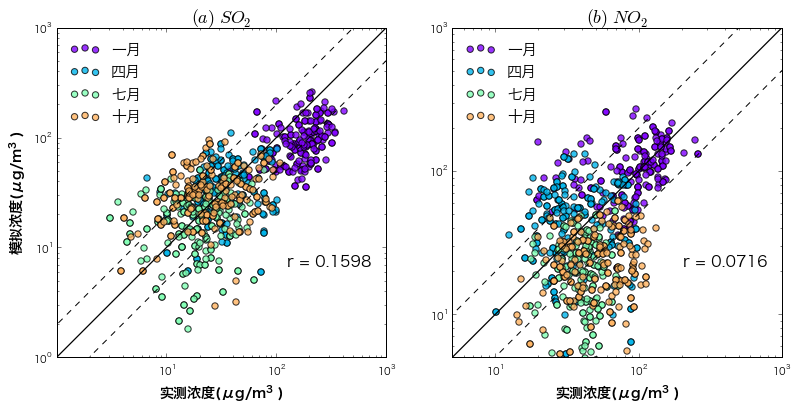

In [166]:
fig = plt.figure(figsize=(13,6))
sss_obs = pd.concat([obs_s_1,obs_s_2,obs_s_3,obs_s_4   ])
sss_mod = pd.concat([sim_s_1,sim_s_2,sim_s_3,sim_s_4   ])
rmean_no2 =(obs_n_1.corr(sim_n_1) + obs_n_2.corr(sim_n_2) + obs_n_3.corr(sim_n_3) + obs_n_4.corr(sim_n_4))/4.0
rmean_so2 =(obs_s_1.corr(sim_s_1) + obs_s_2.corr(sim_s_2) + obs_s_3.corr(sim_s_3) + obs_s_4.corr(sim_s_4))/4.0

ax1 = plt.subplot(121)

cs = plt.cm.rainbow(np.arange(4)/4.0)
ax1.scatter(obs_s_1,sim_s_1,marker = "o" ,color = cs[0],s= 40,edgecolor ='k',alpha =0.8,label = u"一月" )
ax1.scatter(obs_s_2,sim_s_2,marker = "o" ,color = cs[1],s= 40,edgecolor ='k',alpha =0.8,label = u"四月" )
ax1.scatter(obs_s_3,sim_s_3,marker = "o" ,color = cs[2],s= 40,edgecolor ='k',alpha =0.8,label = u"七月" )
ax1.scatter(obs_s_4,sim_s_4,marker = "o" ,color = cs[3],s= 40,edgecolor ='k',alpha =0.8,label = u"十月" )

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(10**0,1000)
ax1.set_ylim(10**0,1000)
ax1.plot([0, 10000], [0, 10000], color='k', linestyle='-', linewidth=1.25)
ax1.plot([0, 40000], [0, 20000], color='k', linestyle='--', linewidth=1)
ax1.plot([0, 20000], [0, 40000], color='k', linestyle='--', linewidth=1)
# ax1.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
# ax1.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax1.set_xticks([10,100,1000])
# ax1.set_yticks([0,100,200,300])
ax1.set_ylabel(u'模拟浓度' + r'$\mathregular{(\mu g/m^3)}$',fontsize = 14,fontweight = 'bold')
ax1.set_xlabel(u'实测浓度' + r'$\mathregular{(\mu g/m^3)}$',fontsize = 14,fontweight = 'bold')
ax1.annotate("r = %s" % (str(rmean_so2)[0:6]),xycoords='axes fraction',xy=(0.7, 0.275),color = "k",fontsize =16,fontstyle ="italic")
plt.title(r'$(a)\ SO_2$',fontsize = 18,fontweight = 'bold')
ax1.set_aspect('equal')
plt.legend(fontsize = 15,frameon=False,loc = 'upper left')


ax2 = plt.subplot(122)
cs = plt.cm.rainbow(np.arange(4)/4.0)
ax2.scatter(obs_n_1,sim_n_1,marker = "o" ,color = cs[0],s= 40,edgecolor ='k',alpha =0.8,label = u"一月" )
ax2.scatter(obs_n_2,sim_n_2,marker = "o" ,color = cs[1],s= 40,edgecolor ='k',alpha =0.8,label = u"四月" )
ax2.scatter(obs_n_3,sim_n_3,marker = "o" ,color = cs[2],s= 40,edgecolor ='k',alpha =0.8,label = u"七月" )
ax2.scatter(obs_n_4,sim_n_4,marker = "o" ,color = cs[3],s= 40,edgecolor ='k',alpha =0.8,label = u"十月" )

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(5*10**0,1000)
ax2.set_ylim(5*10**0,1000)
ax2.plot([0, 10000], [0, 10000], color='k', linestyle='-', linewidth=1.25)
ax2.plot([0, 40000], [0, 20000], color='k', linestyle='--', linewidth=1)
ax2.plot([0, 20000], [0, 40000], color='k', linestyle='--', linewidth=1)

ax2.set_xticks([10,100,1000])

ax2.set_xlabel(u'实测浓度' + r'$\mathregular{(\mu g/m^3)}$',fontsize = 14,fontweight = 'bold')
ax2.annotate("r = %s" % (str(rmean_no2)[0:6]),xycoords='axes fraction',xy=(0.7, 0.275),color = "k",fontsize =16,fontstyle ="italic")
plt.title(r'$(b)\ NO_2$',fontsize = 18,fontweight = 'bold')
ax2.set_aspect('equal')
plt.legend(fontsize = 15,frameon=False,loc = 'upper left')
plt.show()

#### 从上图可以看出
* $SO_2$ 和 $NO_2$ 整体情况上看, 模拟值多小于实测浓度
* $SO_2$ 在4、7、10月的模拟效果较好，而1月份的模拟值明显偏低
* $NO_2$ 在1、4月的模拟效果较好，而7、10两月部分日均值模拟值明显偏低(结合图2)

### 1.2 浓度变化趋势

## 2. 潜在监测点位的识别与排序

应用calpuff模型模拟了2014年各季节代表性月份1、4、7和10月份石家庄市$SO_2$、$NO_2$以及$PM_{10}$的逐时浓度值。基于下述方程计算年日均值作为对应的浓度场FOM:      
    
 <center>$FOM_{(x,y)} =  \frac{\sum_{i=1}^{4}\sum_{j=1}^{30/31}\sum_{t=1}^{24}C(x,y)_{i,j,t}}{\sum_{i=1}^{4}\sum_{j=1}^{30/31}\sum_{t=1}^{24}}$  </center>
 
* i、j 和 t 分别表示月、天和时刻
* $C(x,y)_{i,j,t}$表示第 i 月第 j 天 t 时刻位于(x, y)处大气污染物的浓度值

#### <font color='blue'>潜在监测点识别的原则，是搜寻 FOM 场中最高值。</font>

In [ ]:
## 预先定义
dsu = ds[:,21:52,30:67]
dnu = dn[:,21:52,30:67]
site1, site2, site3, site4, site5, site6, site7,= [12,18],[13,16],[13,15], [11,15], [19,11],[11,12],[13,12]
dsite1_s, dsite2_s, dsite3_s, dsite4_s, dsite5_s, dsite6_s, dsite7_s = dsu[:,12,18],dsu[:,13,16],dsu[:,13,15], dsu[:,11,15], dsu[:,19,12],dsu[:,11,12],dsu[:,13,12]
dsite1_n, dsite2_n, dsite3_n, dsite4_n, dsite5_n, dsite6_n, dsite7_n = dnu[:,12,18],dnu[:,13,16],dnu[:,13,15], dnu[:,11,15], dnu[:,19,12],dnu[:,11,12],dnu[:,13,12]

x_grid = np.arange(252,326,2)
y_grid = np.arange(4188,4250,2)

x_map1,y_map1 = utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[0]
x_map2,y_map2 = utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[0]

x_s1,y_s1 = utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[0]
x_s2,y_s2 = utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[0]

### 1. 确定 格点位置
### 高新园区 化工学校 人民会堂 世纪公园 西北水源 西南高教 职工医院
MS_xlon = [114 + 35.0/60.0 + 32/3600.0, 114 + 33/60.0, 114.0+30/60.0+32/3600.0, 114+31/60.0+48/3600.0,114.0+26/60.0+21/3600.0,
          114.0+27/60.0+17/3600.0,114.0+26/60.0+31/3600.0, ]
MS_ylat =  [38.0+1/60.0+59/3600.0,38.0+2/60.0+52/3600.0,38+2/60.0+45/3600.0,38+1/60.0+28/3600.0,38.0+9/60.0+58/3600.0,
          38.0+17/3600.0,38+2/60.0+41/3600.0,]

#### 2.1 2014 年石家庄市大气 $SO_2$ FOM 浓度场的分布特征

In [169]:
so2_mean =  dsu.mean(axis = 0)
no2_mean =  dnu.mean(axis = 0)

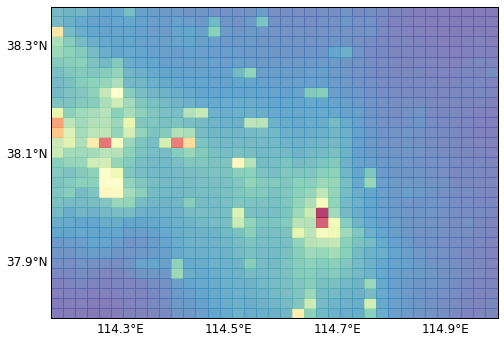

In [196]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot()

ax1 = plt.subplot()
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=12,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=12,linewidth=0)
# map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)

v_pl =plt.pcolor(xx,yy,so2_mean,cmap = plt.cm.Spectral_r ,alpha =0.75,zorder =2)

plt.show()

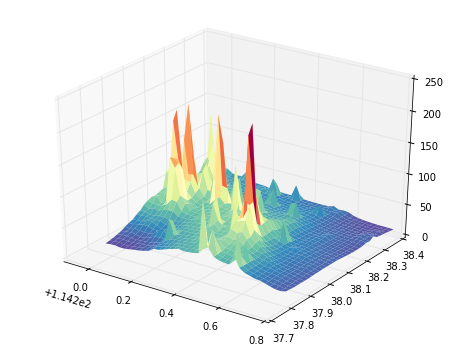

In [233]:
import mpl_toolkits.mplot3d.axes3d as axes3d
fig,ax = plt.subplots(subplot_kw=dict(projection='3d'),figsize = (8,6))
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid))
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid))
xx,yy = np.meshgrid(lon_grid,lat_grid)
ax.plot_surface(xx, yy,so2_mean,rstride = 1,cstride = 1,\
                cmap=plt.cm.Spectral_r,linewidth = 0)
ax.view_init(azim=-55,elev =30)
plt.show()

#### 备选点位排序 -前200

| 编号 |x 轴(km) | Y 轴 (km) |
| ------------ | ------------- | ------------ |
| 1 | 5  | 23 |
| 2 | 21  | 0 |
| 3 | 11  | 17 |
| 4 | 21  | 1 |
| 5 | 10  | 17 |
| ... | ...  | ... |
| 200| 15  | 13 |

#### 2.2 2014 年石家庄市大气 $NO_2$ FOM 浓度场的分布特征

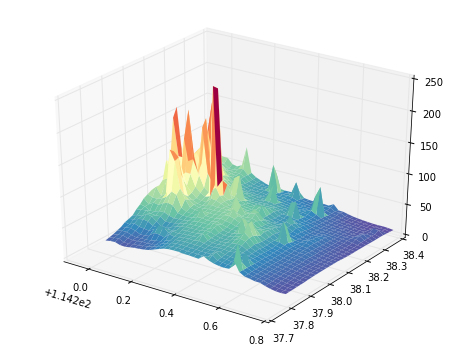

In [243]:
import mpl_toolkits.mplot3d.axes3d as axes3d
fig,ax = plt.subplots(subplot_kw=dict(projection='3d'),figsize = (8,6))
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid))
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid))
xx,yy = np.meshgrid(lon_grid,lat_grid)
ax.plot_surface(xx, yy,no2_mean,rstride = 1,cstride = 1,\
                cmap=plt.cm.Spectral_r,linewidth = 0)
ax.view_init(azim=-55,elev =30)
plt.show()

| 编号 |x 轴(km) | Y 轴 (km) |
| ------------ | ------------- | ------------ |
| 1 | 4  | 20|
| 2 | 2  | 20 |
| 3 | 1  | 20 |
| 4 | 5  | 20 |
| 5 | 6  | 19 |
| ... | ...  | ... |
| 200|  17 | 13 |

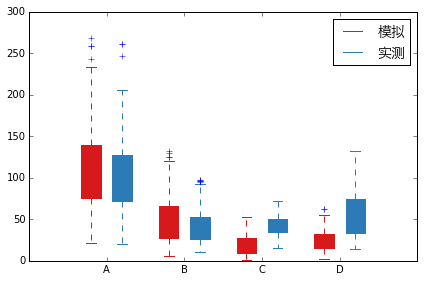

In [151]:
### boxplot 好东西

import matplotlib.pyplot as plt
import numpy as np

data_a = [sim_n_1,sim_n_2, sim_n_3,sim_n_4]
data_b = [obs_n_1,obs_n_2, obs_n_3,obs_n_4]

ticks = ['A', 'B', 'C','D']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(xrange(len(data_a)))*2.0-0.4, sym='+', widths=0.5, patch_artist=True)
bpr = plt.boxplot(data_b, positions=np.array(xrange(len(data_b)))*2.0+0.4, sym='+', widths=0.5,patch_artist=True)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label=u'模拟')
plt.plot([], c='#2C7BB6', label=u'实测')
plt.legend(fontsize = 14)

plt.xticks(xrange(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
# plt.ylim(0, 8)
plt.tight_layout()
# plt.close()

Default Color
<font color='red'>Red Color</font>
<font color='blue'>Blue Color</font>
<font color='green'>Green Color</font>
<font color='yellow'>Yellow Color</font>
<font color='pink'>Pink Color</font>
<font color='purple'>Purple Color</font>
<font color='orange'>Orange Color</font>

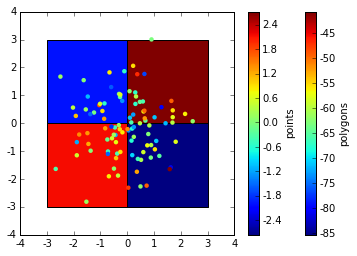

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# some random numbers for demonstration
data = np.random.normal(0, 1, (100, 2))
value = np.random.normal(0, 1, 100)

polygons = [
    Polygon([(0, 0), (0, 3), (-3, 3), (-3, 0)], closed=True),
    Polygon([(0, 0), (0, -3), (-3, -3), (-3, 0)], closed=True),
    Polygon([(0, 0), (0, 3), (3, 3), (3, 0)], closed=True),
    Polygon([(0, 0), (0, -3), (3, -3), (3, 0)], closed=True),
]


poly_values = []
for poly in polygons:
    mask = np.array([poly.contains_point(xy) for xy in data])
    poly_values.append(value[mask].sum())


coll = PatchCollection(polygons)
coll.set_array(np.array(poly_values))

fig, ax = plt.subplots()
ax.add_collection(coll)
points = ax.scatter(data[:, 0], data[:, 1], c=value, linewidth=0)
fig.colorbar(coll, label='polygons')
fig.colorbar(points, label='points')
plt.show()

In [211]:
poly

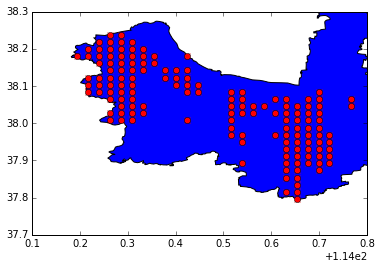

In [235]:
import numpy as np
from shapely.geometry import Polygon, Point
c = fiona.open("/Users/HYF/Documents/SJZ/pre/sjz_urban/sjz_urban_combine/sjz_urban_line.shp")
pol = c.next()
geom = shape(pol['geometry'])
poly_data = pol["geometry"]["coordinates"][0]
poly = Polygon(poly_data)


xx = lon_grid[pt_select.X.iloc[:].as_matrix()]
yy = lat_grid[pt_select.Y.iloc[:].as_matrix()]

sh = (len(xx),2)
points = np.zeros(len(xx)*2).reshape(*sh)
for i in range(0,len(xx),1):
    points[i] = np.array([xx[i],yy[i]])
mask = np.array([poly.contains(Point(x, y)) for x, y in points])

fig = plt.figure()
ax = plt.subplot()
ax.plot(points[:, 0], points[:, 1], "rx")
ax.plot(points[mask, 0], points[mask, 1], "ro")   
ax.add_patch(plt.Polygon(poly_data))

In [230]:
poly.contains_point(x,y) for x,y in points

SyntaxError: invalid syntax (<ipython-input-230-53b7d75680f6>, line 1)

In [220]:
import shapely
from shapely.geometry import shape

In [221]:
shape

<function shapely.geometry.geo.shape>

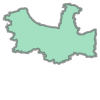

In [223]:
shape(pol["geometry"])